Коэффициенты C: [-1.03372535  4.11247217 -5.92215956  0.59786207  3.39076752  1.59233704
 -1.25290685 -2.57479879 -1.36711049  2.40142947]


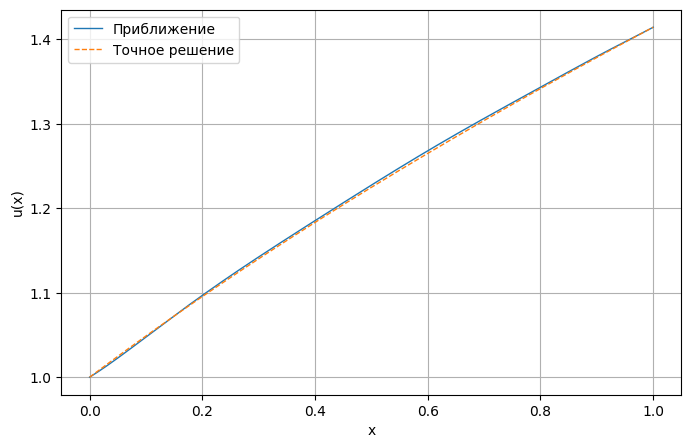

0.0030731304414715055

 u(x) = 2.40142947425588*x**12 - 3.76853996366359*x**11 - 1.20768829938032*x**10 + 1.32189194282934*x**9 + 2.84524388548447*x**8 + 1.79843048056583*x**7 - 2.79290544708122*x**6 - 6.52002163153615*x**5 + 10.034631723608*x**4 - 5.14619751369747*x**3 + 1.03372534861518*x**2 + 0.5*x + 1.0


In [106]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize
from sympy import symbols, diff, lambdify, simplify, Symbol
import matplotlib.pyplot as plt
from sympy import symbols

a, b = 0, 1


def u_exact(x):
    return np.sqrt(x+1)


def p(x):
    return (x+1)**0.5

def q(x):
    return -1

def f_func(x):
    return -np.sqrt(x + 1)


B = 1
c = np.sqrt(2) - 1

def phi0(x):
    return B + c * x

def dphi0(x):
    return 0.5


n = 10

x_sym = symbols('x')
phi_sym = []
for k in range(1, n+1):
    phi_sym.append( x_sym**(k+1) * (x_sym - 1) )


phi_funcs = [lambdify(x_sym, f_expr, 'numpy') for f_expr in phi_sym]
dphi_funcs = [lambdify(x_sym, diff(f_expr, x_sym), 'numpy') for f_expr in phi_sym]



def u_approx(x_val, C):
    return phi0(x_val) + sum(C[i] * phi_funcs[i](x_val) for i in range(n))


def du_approx(x_val, C):
    return dphi0(x_val) + sum(C[i] * dphi_funcs[i](x_val) for i in range(n))


def J(C):
    integrand = lambda x_val: p(x_val) * (du_approx(x_val, C))**2 \
                              + q(x_val) * (u_approx(x_val, C))**2 \
                              - 2 * f_func(x_val) * u_approx(x_val, C)
    return quad(integrand, a, b)[0]


C0 = np.zeros(n)
res = minimize(J, C0)
C_opt = res.x
print("Коэффициенты C:", C_opt)


def u_opt(x_val):
    return u_approx(x_val, C_opt)

x_vals = np.linspace(a, b, 200)
u_vals = np.array([u_opt(xi) for xi in x_vals])
u_ex_vals = np.array([u_exact(xi) for xi in x_vals])

plt.figure(figsize=(8,5))
plt.plot(x_vals, u_vals, label='Приближение', lw=1)
plt.plot(x_vals, u_ex_vals, label='Точное решение', linestyle='--', lw=1)
plt.xlabel('x')
plt.ylabel('u(x)')

plt.legend()
plt.grid(True)
plt.show()

print(np.max(np.abs(u_ex_vals - u_vals)))


C_syms = [Symbol(f'C{i+1}') for i in range(n)]
phi0_sym = B + 0.5*x_sym
u_sym_expr = phi0_sym + sum(C_syms[i]*phi_sym[i] for i in range(n))
subs_dict = {C_syms[i]: C_opt[i] for i in range(n)}
u_sym_final = simplify(u_sym_expr.subs(subs_dict))
print(f"\n u(x) = {u_sym_final}")

